In [1]:
# importando bibliotecas conexão PDGT
import json
import argparse
import subprocess
import boto3
import time
from pyathena import connect
import pandas.io.sql as sqlio
import sys
from ydata_profiling import ProfileReport
from botocore import UNSIGNED
from botocore.config import Config
import boto3.session
from botocore import exceptions
from scipy.stats import chi2_contingency

/home/lucasmateus/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
#importando bibliotecas padrão
import pandas as pd
from datetime import datetime
from validate_docbr import CPF
import matplotlib.pyplot as plt

In [3]:
class CustomException(Exception):
    pass

In [4]:
json_manifest_dbt = "target/manifest.json"
athena_bucket = "todos-athena-us-east-1"
athena_tmp_folder = f"s3://{athena_bucket}/"

In [5]:
def execute_athena_sql(query):
    client = boto3.client('athena', region_name='us-east-1')
    queryStart = client.start_query_execution(
    QueryString = query,
    ResultConfiguration = { 'OutputLocation': athena_tmp_folder})
    queryExecution = client.get_query_execution(QueryExecutionId=queryStart['QueryExecutionId'])
    while queryExecution['QueryExecution']['Status']['State'] in ('RUNNING', 'QUEUED'):
        time.sleep(5)
        queryExecution = client.get_query_execution(QueryExecutionId=queryStart['QueryExecutionId'])

In [6]:
def execute_athena_query(query):
    cursor = connect(s3_staging_dir=athena_tmp_folder,
                    region_name="us-east-1").cursor()
    cursor.execute(query)
    colls=','.join(str(f"{e[0]}") for e in cursor.description)
    results=pd.DataFrame(list(cursor), columns=colls.split(","))
    return results

In [8]:
query_total = """

"""

In [9]:
df_total = execute_athena_query(query_total)

In [22]:
total_pacientes = df_total['qtd_pacientes'].iloc[0]

,id,ativo,obito,prontuario,cpf,primeiro_nome,sobrenome,nome_social,rg,data_nascimento,...,genero_id,origem_id,prioridades_id,est_civil_id,mig_prontuario_id,CDT_MATRICULA,last_attendance_data,titular,validade,cpf_valido
0,64538239,1,None,64538239,11530191831,Roseli,Thome,Roseli Thome,None,15/06/1968,...,None,0,None,None,None,SP453005390,None,Titular,31/12/2024,True
1,65893513,1,None,65893513,37709937802,GABRIELE,DE SOUZA GONÇALVES,GABRIELE DE SOUZA GONÇALVES,None,21/04/1999,...,None,0,None,None,None,SP453004807,None,Titular,31/12/2024,True
2,61597184,1,None,61597184,37670377852,JESSICA,CRISTINA DOS SANTOS,JESSICA CRISTINA DOS SANTOS,None,19/03/1991,...,None,0,None,None,None,SP442002001,None,Titular,31/12/2024,True
3,60986861,1,None,60986861,53524320848,Luna,Raissa Valim,Luna Raissa Valim,None,08/09/2017,...,None,0,None,None,None,SP442000830,None,None,31/12/2024,True
4,63054598,1,None,63054598,43042693805,Isa,Caroline Coelho Da Silva,Isa Caroline Coelho Da Silva,None,06/06/1993,...,None,0,None,None,None,SP442002215,None,None,31/12/2024,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6954,68237811,1,None,68237811,47991428877,Guilherme,Jacinto,Guilherme Jacinto,None,13/03/2002,...,None,0,None,None,None,None,None,None,31/12/2024,True
6955,61229749,1,None,61229749,02911076800,Silvia,Beatriz Reliquia Louzada,Silvia Beatriz Reliquia Louzada,None,24/03/1961,...,None,0,None,None,None,SP442002279,None,None,31/12/2024,True
6956,61694310,1,None,61694310,10538711809,Luiz,Carlos Da Silva,Luiz Carlos Da Silva,None,09/12/1968,...,None,0,None,None,None,SP442001690,None,Titular,31/12/2024,True
6957,60324008,1,None,60324008,50048700800,Maria,Stefani Soares Da Silva,Maria Stefani Soares Da Silva,None,02/07/2012,...,None,0,None,None,None,SP442001792,None,None,31/12/2024,True


Proporção de CPFs inválidos em relação ao total: 0.01%


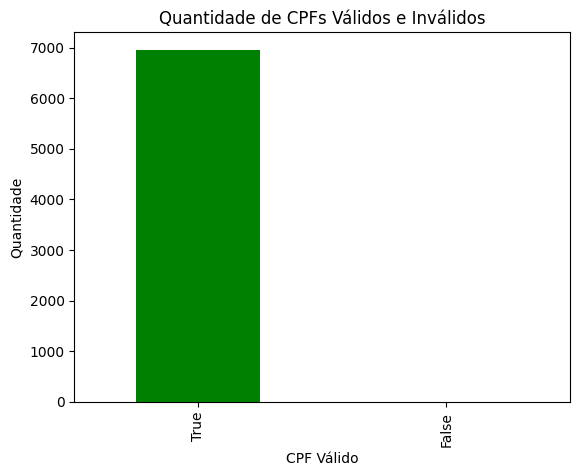

In [27]:
query_cpf = """

"""

df_cpf = execute_athena_query(query_cpf)

total_cpf = df_cpf['qtd_pacientes'].iloc[0]

In [13]:
query_cpf_email = """

"""

df_cpf_email = execute_athena_query(query_cpf_email)

total_cpf_email = df_cpf_email['qtd_pacientes'].iloc[0]

In [14]:
query_email_null = """

"""

df_email_null = execute_athena_query(query_email_null)

total_email_null = df_email_null['qtd_pacientes'].iloc[0]

In [36]:
# Calcula quantidades restantes e proporções
invalido_cpf = total_pacientes - total_cpf



# Exibe quantidades e proporções
print(f'Quantidade de registros totais de pacientes: {total_pacientes}')
print(f'Quantidade de registros com CPF tratado: {total_cpf}')
print(f'Quantidade de registroscom CPF inválido: {invalido_cpf}')
print(f'Proporção de CPFs inválidos em relação aos CPFs tratados: {proporcao_invalidos:.2%}')
print(f'Quantidade de registros válidos: {quantidade_true}')
print(f'Quantidade de registros descartados: {quantidade_false}')
print(f'Proporção de registros válidos: {proporcao_true_total:.2%}')
print(f'Proporção de registros descartados: {proporcao_subtracao_total:.2%}')

Quantidade de registros totais: 7695
Quantidade de registros tratados em SQL: 6959
Quantidade de registros inválidos: 1
Proporção de CPFs inválidos em relação aos CPFs tratados: 0.01%
Quantidade de registros válidos: 6958
Quantidade de registros descartados: 737
Proporção de registros válidos: 90.42%
Proporção de registros descartados: 9.58%
